In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('Harga BawangTest.csv', sep=';')
# Drop rows with missing values
df = df.dropna()

In [3]:
df.head

<bound method NDFrame.head of         Tanggal  Harga
0    01/12/2022  34.21
1    02/12/2022  34.42
2    03/12/2022  34.28
3    04/12/2022  34.51
4    05/12/2022  34.51
..          ...    ...
361  27/11/2023  28.94
362  28/11/2023  29.19
363  29/11/2023  29.09
364  30/11/2023  29.24
365  01/12/2023  29.32

[365 rows x 2 columns]>




Epoch 1/50

9/9 [==============================] - 3s 6ms/step - loss: 0.2171
Epoch 2/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0339
Epoch 3/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0142
Epoch 4/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0105
Epoch 5/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0078
Epoch 6/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0048
Epoch 7/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0034
Epoch 8/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0031
Epoch 9/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 10/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 11/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 12/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0024
Epoch 13/50
9/9 [==============================] - 0s 5ms/step - loss

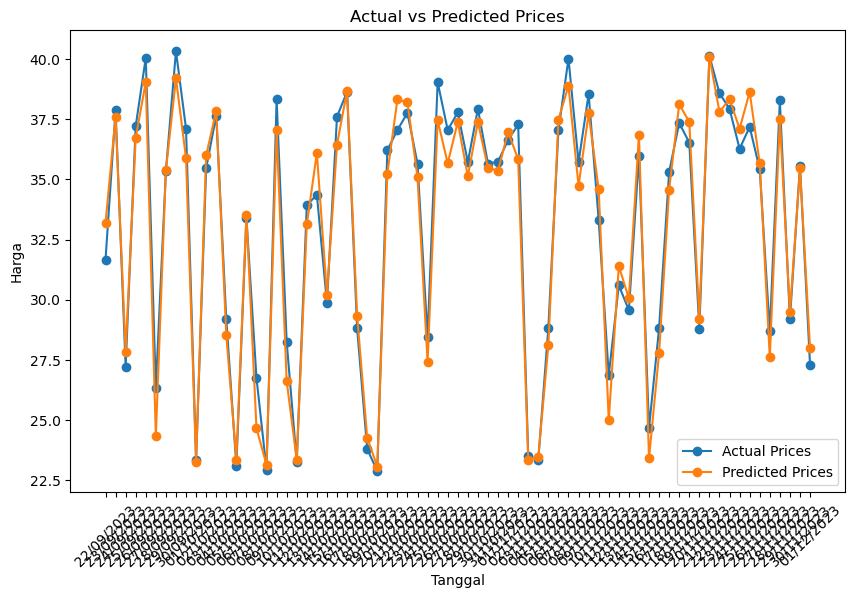

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the CSV file into a DataFrame
df = pd.read_csv('Harga BawangTest.csv', sep=';')
# Drop rows with missing values
df = df.dropna()

# Extract relevant columns
data = df[['Harga']].values.astype(float)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Function to create input data sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:(i + seq_length), 0]
        label = data[i + seq_length, 0]
        x.append(seq)
        y.append(label)
    return np.array(x), np.array(y)

# Define sequence length (number of time steps to look back)
sequence_length = 10

# Create sequences
x, y = create_sequences(data_normalized, sequence_length)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape input data to be 3D (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], sequence_length, 1))
x_test = np.reshape(x_test, (x_test.shape[0], sequence_length, 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Mean Squared Error on Test Set: {loss}')

# Make predictions
predictions = model.predict(x_test)

# Denormalize the data
predictions_denormalized = scaler.inverse_transform(predictions)
y_test_denormalized = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Tanggal'].iloc[-len(y_test):], y_test_denormalized, label='Actual Prices', marker='o')
plt.plot(df['Tanggal'].iloc[-len(y_test):], predictions_denormalized, label='Predicted Prices', marker='o')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [5]:
print(predictions_denormalized)

[[33.189156]
 [37.58946 ]
 [27.82771 ]
 [36.72417 ]
 [39.043995]
 [24.337076]
 [35.375523]
 [39.199688]
 [35.881287]
 [23.27571 ]
 [35.991955]
 [37.842434]
 [28.536793]
 [23.35139 ]
 [33.53501 ]
 [24.655642]
 [23.13814 ]
 [37.032253]
 [26.61674 ]
 [23.34904 ]
 [33.131817]
 [36.09485 ]
 [30.198126]
 [36.447598]
 [38.675644]
 [29.34361 ]
 [24.262905]
 [23.068607]
 [35.225334]
 [38.31823 ]
 [38.20246 ]
 [35.097893]
 [27.398235]
 [37.459118]
 [35.666683]
 [37.386013]
 [35.128   ]
 [37.384594]
 [35.47053 ]
 [35.363045]
 [36.971962]
 [35.827003]
 [23.357477]
 [23.471355]
 [28.106495]
 [37.47698 ]
 [38.89134 ]
 [34.726818]
 [37.738384]
 [34.585503]
 [24.990318]
 [31.392876]
 [30.053352]
 [36.86373 ]
 [23.404207]
 [27.781477]
 [34.5781  ]
 [38.123276]
 [37.385826]
 [29.208199]
 [40.093323]
 [37.808296]
 [38.329906]
 [37.105995]
 [38.630795]
 [35.660275]
 [27.602468]
 [37.495865]
 [29.476755]
 [35.455017]
 [27.98278 ]]


In [7]:
from datetime import datetime, timedelta

# Ambil tanggal terakhir dalam dataset
tanggal_terakhir = df['Tanggal'].iloc[-1]
tanggal_terakhir = datetime.strptime(tanggal_terakhir, '%d/%m/%Y')

# Meminta pengguna memasukkan tanggal prediksi
tanggal_prediksi_input = input("Masukkan tanggal prediksi (format: dd/mm/yyyy): ")
tanggal_prediksi = datetime.strptime(tanggal_prediksi_input, '%d/%m/%Y')

# Hitung selisih hari antara tanggal terakhir dan tanggal prediksi
selisih_hari = (tanggal_prediksi - tanggal_terakhir).days

# Tentukan jumlah langkah waktu ke depan
jumlah_langkah_waktu_ke_depan = selisih_hari

# Ambil sebagian terakhir dari dataset untuk digunakan sebagai awal prediksi
data_akhir = data_normalized[-sequence_length:]
data_akhir = np.reshape(data_akhir, (1, sequence_length, 1))

# Inisialisasi variabel untuk menyimpan hasil prediksi
hasil_prediksi = None

# Buat prediksi untuk jumlah langkah waktu ke depan
for _ in range(jumlah_langkah_waktu_ke_depan):
    # Buat prediksi untuk langkah waktu saat ini
    prediksi_langkah_ini = model.predict(data_akhir)

    # Denormalisasi hasil prediksi
    prediksi_langkah_ini_denormalized = scaler.inverse_transform(prediksi_langkah_ini.reshape(-1, 1))

    # Tambahkan prediksi ke hasil yang sudah ada
    data_akhir = np.append(data_akhir[:, 1:, :], prediksi_langkah_ini.reshape(1, 1, 1), axis=1)

    # Simpan hasil prediksi untuk digunakan di luar loop
    hasil_prediksi = prediksi_langkah_ini_denormalized[0, 0]

# Tampilkan hasil prediksi untuk tanggal yang diinginkan
print(f'Prediksi Harga untuk Tanggal {tanggal_prediksi.strftime("%d/%m/%Y")}: {hasil_prediksi}')


1/1 [==============================] - 0s 24ms/step
Prediksi Harga untuk Tanggal 20/12/2023: 27.92359733581543


In [ ]:
from keras.models import load_model
import numpy as np
import tensorflow as tf

model.save(predictions_denormalized,'model.h5')


TypeError: ignored